In [1]:
import pandas as pd
import seaborn as sns
from math import pi

df = pd.read_csv("log_pursuit.csv")

df["angledeg"] = df["angle"]/pi * 180

for i in range(1,4):
    df[f"time{i}"] = df[f"hit{i}"]/df["tps"]

df[df["time1"] == max(df["time1"])]

angle     tps    hit1    hit2    hit3   angledeg     time1     time2  \
384  0.998205  200000  620929  620929  866368  57.192931  3.104645  3.104645   
385  0.998206  200000  620929  620929  866368  57.192965  3.104645  3.104645   
386  0.998206  200000  620929  620929  866368  57.193008  3.104645  3.104645   
387  0.998207  200000  620929  620929  866368  57.193023  3.104645  3.104645   
388  0.998207  200000  620929  620929  866368  57.193037  3.104645  3.104645   
389  0.998207  200000  620929  620929  866368  57.193039  3.104645  3.104645   
390  0.998207  200000  620929  620929  866368  57.193057  3.104645  3.104645   
391  0.998207  200000  620929  620929  866368  57.193061  3.104645  3.104645   
392  0.998207  200000  620929  620929  866368  57.193064  3.104645  3.104645   
393  0.998207  200000  620929  620929  866368  57.193065  3.104645  3.104645   
394  0.998207  200000  620929  620930  866368  57.193068  3.104645  3.104650   
395  0.998207  200000  620929  620930  866368  57.193077  3.104645  3.104650   
396  0.998208  200000  620929  620930  866368  57.193110  3.104645  3.104650   
397  0.998208  200000  620929  620930  866368  57.193114  3.104645  3.104650   
398  0.998208  200000  620929  620930  866368  57.193126  3.104645  3.104650   
399  0.998209  200000  620929  620930  866368  57.193140  3.104645  3.104650   
400  0.998209  200000  620929  620930  866368  57.193142  3.104645  3.104650   

       time3  
384  4.33184  
385  4.33184  
386  4.33184  
387  4.33184  
388  4.33184  
389  4.33184  
390  4.33184  
391  4.33184  
392  4.33184  
393  4.33184  
394  4.33184  
395  4.33184  
396  4.33184  
397  4.33184  
398  4.33184  
399  4.33184  
400  4.33184

unit 6480000 30 216000
{60.0: '60°', 90.0: '90°', 120.0: '120°', 150.0: '150°', 180.0: '180°'}
unit 108000 30 3600
{56.0: '56°', 56.5: "56°30'", 57.0: '57°', 57.5: "57°30'", 58.0: '58°'}
unit 21600 6 3600
{57.0: '57°', 57.1: "57°6'", 57.2: "57°12'", 57.3: "57°18'", 57.4: "57°24'", 57.5: "57°30'", 57.6: "57°36'", 57.7: "57°42'"}
unit 21600 6 3600
{57.1: "6'", 57.2: "12'", 57.3: "18'", 57.4: "24'"}
unit 10800 3 3600
{57.15: "9'", 57.2: "12'", 57.25: "15'", 57.3: "18'", 57.35: "21'", 57.4: "24'"}
unit 3600 1 3600
{57.166666666666664: "10'", 57.18333333333333: "11'", 57.2: "12'", 57.21666666666667: "13'", 57.233333333333334: "14'"}
unit 1800 30 60
{57.18333333333333: "11'", 57.19166666666667: '11\'30"', 57.2: "12'", 57.208333333333336: '12\'30"', 57.21666666666667: "13'"}
unit 900 15 60
{57.1875: '11\'15"', 57.19166666666667: '11\'30"', 57.19583333333333: '11\'45"', 57.2: "12'", 57.204166666666666: '12\'15"', 57.208333333333336: '12\'30"'}
unit 600 10 60
{57.18888888888889: '11\'20"', 57.1

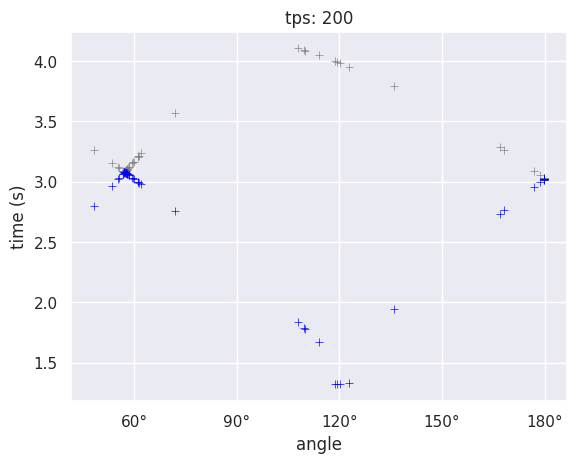

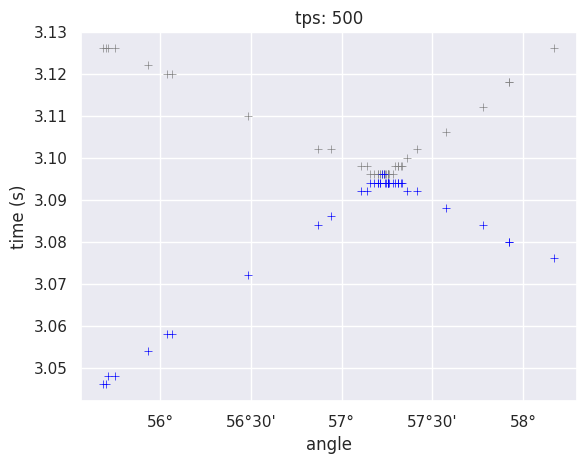

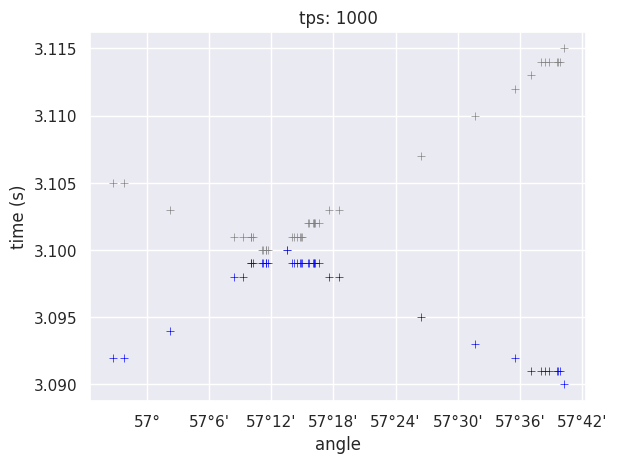

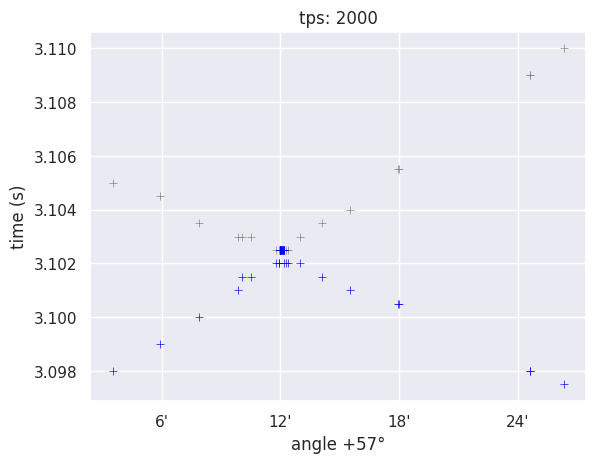

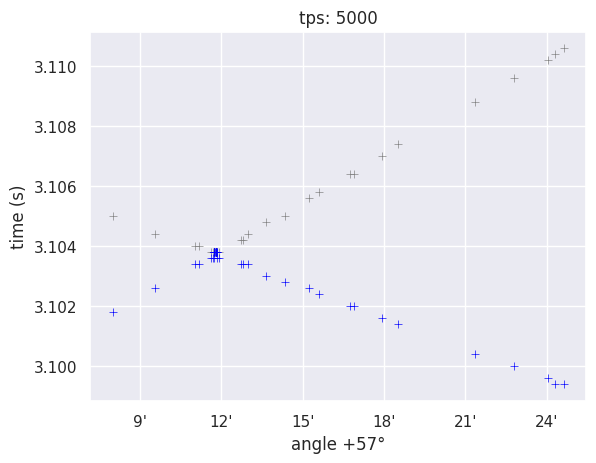

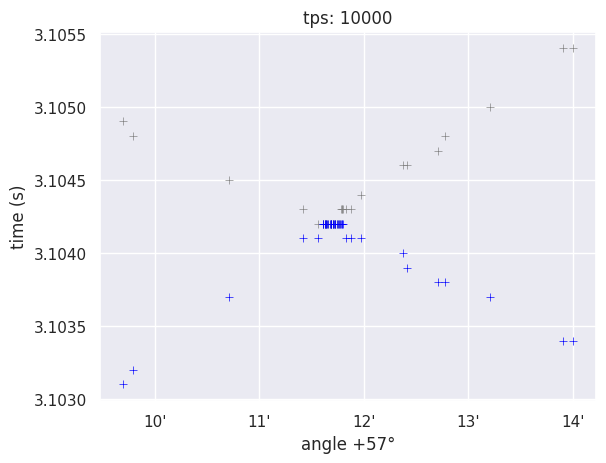

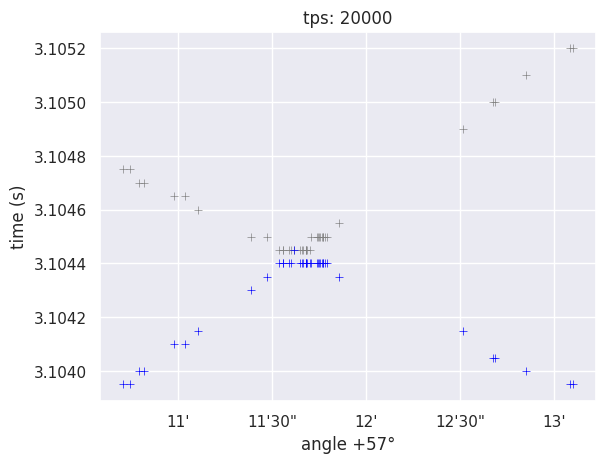

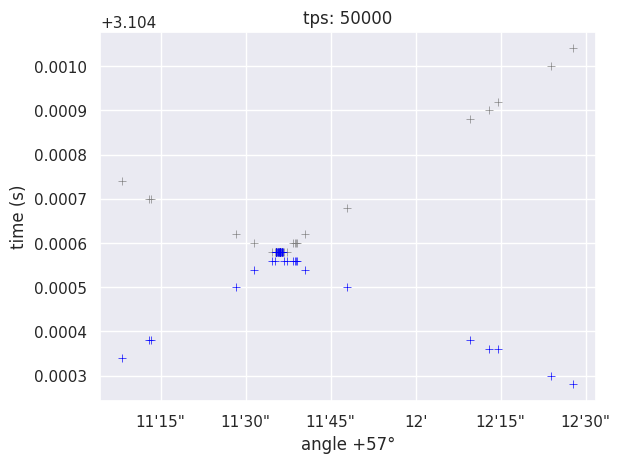

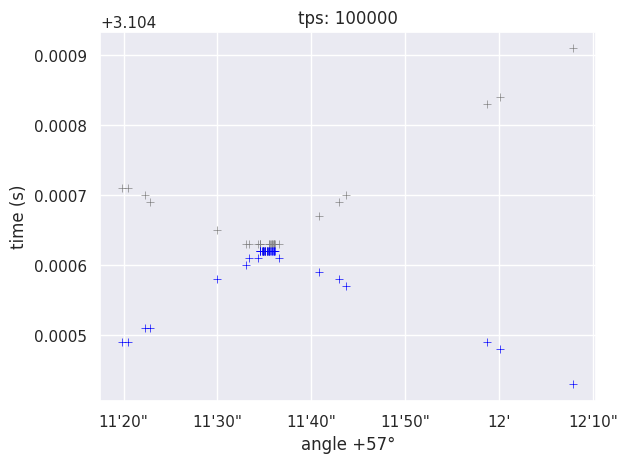

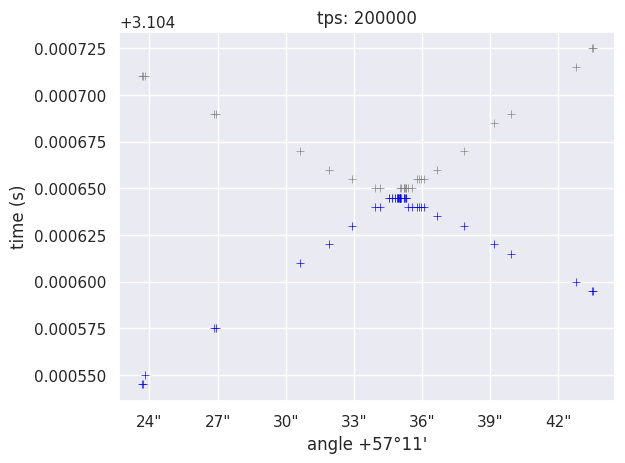

In [3]:
import matplotlib.ticker as tkr
import simulation
from math import floor, ceil

import matplotlib.pyplot as plt
import seaborn as sns


def breakdown_seconds(sys):
    sys = int(sys)
    return sys//60**3, sys//3600, sys//60, sys

def build_similar(low, high, index):
    unit = "°'\"~"[index]
    if low[index] == high[index]:
        return f"{low[index] % 60}{unit}"
    else:
        return ''
    
def build_different(sys, low, high, index):
    unit = "°'\"~"[index]
    if low[index] >= high[index]:
        return ''
    elif index == 0:
        return f"{sys[index]}{unit}" 
    elif sys[index] % 60 == 0:
        return ''
    else:
        return f"{sys[index] % 60}{unit}"
        

def construct_xticks_and_data(limits, number_of_ticks= 8):
    low, high = limits
    
    low_in_secs = ceil(low*60**3)
    high_in_secs = floor(high*60**3)
    
    low_base60 = breakdown_seconds(low_in_secs)
    high_base60 = breakdown_seconds(high_in_secs)
    
    mult_per_magnetude = (1,2, 3, 6, 10, 15, 30)
    for max_i, magnetude in enumerate((1, 60, 3600, 60**3)):
        for mul in mult_per_magnetude:
            unit = magnetude*mul
            if (high_in_secs-low_in_secs)//unit < number_of_ticks:
                print("unit", unit, mul, magnetude)
                offset = ''.join(build_similar( low_base60, high_base60, i) for i in range(4))
                ticks = {}
                start = ceil(low_in_secs/unit) * unit
                end_ = floor(high_in_secs/unit) * unit
                for sys in range(start, end_ + unit, unit):
                    sysvalue = sys/60**3
                    sys_base60 = breakdown_seconds(sys)
                    syslabel = ''.join(build_different(sys_base60, low_base60, high_base60, i) for i in range(4))
                    ticks[sysvalue] = syslabel
                return offset, ticks

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)

for i, (tps, data) in enumerate(df.groupby("tps")):
    
    fig = plt.figure()
    
    ax = plt.gca()
    


    sns.scatterplot(data, x="angledeg", y="time2", marker='+', color="grey", ax=ax)
    sns.scatterplot(data, x="angledeg", y="time1", marker='+', color="blue", ax=ax)


   

    offset, data = construct_xticks_and_data(ax.get_xlim())
    print(data)
    ax.xaxis.set_ticks(list(data.keys()), labels=list(data.values()))
    if offset:
        ax.set_xlabel(f"angle +{offset}")
    else:
        ax.set_xlabel(f"angle")
    ax.set_title(f"tps: {tps}")
    ax.set_ylabel("time (s)")
    fig.savefig(f"graph_{tps}.png", bbox_inches="tight")

